**Часть первая: о теореме Байеса**

1.

2.

3.

**Часть вторая: о линейной регрессии**

In [1]:
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
#df.count()

In [5]:
df['date'] = df['date'].apply(pd.to_datetime)

In [6]:
#df.info()

In [7]:
#df.head()

In [8]:
#df['location'].unique()

In [9]:
df_rus = df[df['location']=='Russia']

In [10]:
df_rus.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52563,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52564,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52565,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52566,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52567,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [11]:
#df_rus.count()

In [12]:
to_del = df_rus.columns[df_rus.count() == 0]

In [13]:
df_rus = df_rus.drop(to_del, axis=1)

In [14]:
df_rus = df_rus[df_rus['date']>='20200303']

In [21]:
#добавляем номер дня
df_rus['day_num'] = np.arange(1, df_rus.shape[0] + 1)

In [22]:
df_rus['day_num'].head()

52595    1
52596    2
52597    3
52598    4
52599    5
Name: day_num, dtype: int32

In [23]:
df_rus['date'].count()

359

In [24]:
df_rus[['total_cases', 'new_cases']]

,total_cases,new_cases
52595,3.0,0.0
52596,3.0,0.0
52597,4.0,1.0
52598,13.0,9.0
52599,13.0,0.0
...,...,...
52949,4105424.0,12775.0
52950,4117992.0,12568.0
52951,4130447.0,12455.0
52952,4142126.0,11679.0


In [27]:
train = df_rus[(df_rus['date']>='20200303') & (df_rus['date']<pd.to_datetime('20200303')+timedelta(days=50))]

In [28]:
#df_rus.head()

In [29]:
test = df_rus[df_rus['date'] >= pd.to_datetime('20200303')+timedelta(days=50)]

<AxesSubplot:>

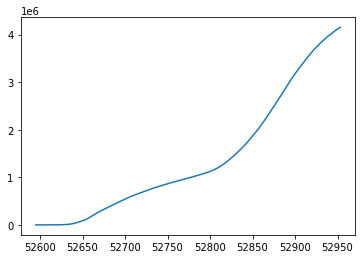

In [30]:
df_rus['total_cases'].plot()

<AxesSubplot:>

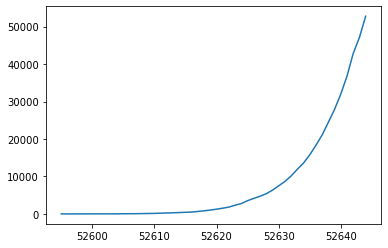

In [31]:
train['total_cases'].plot()

<AxesSubplot:>

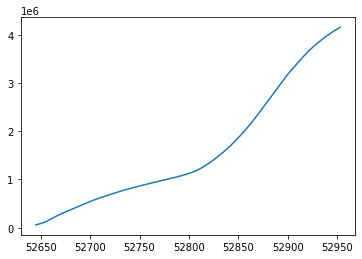

In [32]:
test['total_cases'].plot()

<AxesSubplot:>

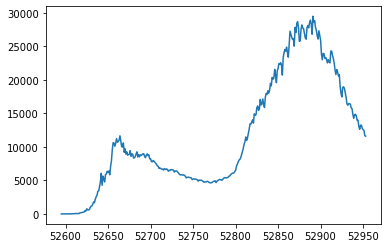

In [33]:
df_rus['new_cases'].plot()

<AxesSubplot:>

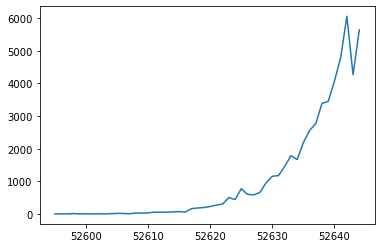

In [34]:
train['new_cases'].plot()

<AxesSubplot:>

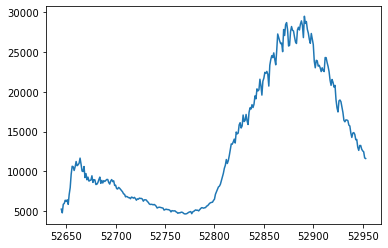

In [35]:
test['new_cases'].plot()

In [45]:
y = [np.exp(i) for i in train['day_num']]

In [46]:
y

[2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766,
 403.4287934927351,
 1096.6331584284585,
 2980.9579870417283,
 8103.083927575384,
 22026.465794806718,
 59874.14171519782,
 162754.79141900392,
 442413.3920089205,
 1202604.2841647768,
 3269017.3724721107,
 8886110.520507872,
 24154952.7535753,
 65659969.13733051,
 178482300.96318725,
 485165195.4097903,
 1318815734.4832146,
 3584912846.131592,
 9744803446.248903,
 26489122129.84347,
 72004899337.38588,
 195729609428.83878,
 532048240601.7986,
 1446257064291.475,
 3931334297144.042,
 10686474581524.463,
 29048849665247.426,
 78962960182680.69,
 214643579785916.06,
 583461742527454.9,
 1586013452313430.8,
 4311231547115195.0,
 1.1719142372802612e+16,
 3.1855931757113756e+16,
 8.659340042399374e+16,
 2.3538526683702e+17,
 6.398434935300549e+17,
 1.739274941520501e+18,
 4.727839468229346e+18,
 1.2851600114359308e+19,
 3.4934271057485095e+19,
 9.496119420602448e+19,
 2.5813128861900675e+20,

In [74]:
#train['day_num'].values.reshape(-1, 1)

In [47]:
lr = LinearRegression()

In [75]:
lr.fit(np.exp(train['day_num']).values.reshape(-1,1), train.total_cases)

LinearRegression()

In [80]:
test['pred'] = lr.predict(np.exp(test['day_num']).values.reshape(-1,1))

C:\Users\Admin\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

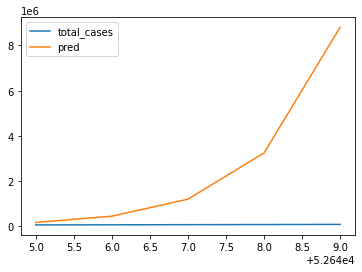

In [91]:
test[test.index < 52650][['total_cases', 'pred']].plot()

<AxesSubplot:>

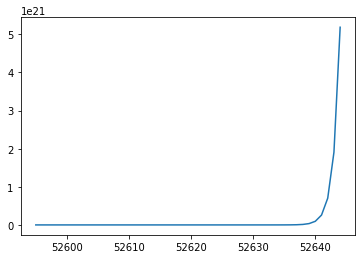

In [86]:
np.exp(train['day_num']).plot()

<AxesSubplot:>

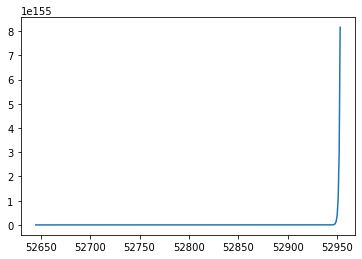

In [87]:
np.exp(test['day_num']).plot()

In [83]:
lr.coef_

array([1.14380396e-17])

In [84]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [68]:
np.exp(51)

1.4093490824269389e+22

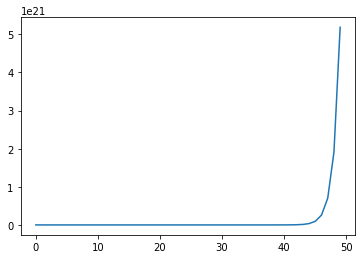

In [69]:
plt.plot(y)

In [ ]:
day_num = [x for x in range(1,51)]

In [ ]:
y

In [ ]:
xs = np.arange(-0.01, 1.01, 0.005)

In [ ]:
xs

In [ ]:
df_rus[df_rus['date']>='20200303']['date'].nunique()

In [ ]:
pd.to_datetime('20200303')+timedelta(days=50)

In [ ]:
train = df_rus[(df_rus['date']>='20200303') & (df_rus['date']<pd.to_datetime('20200303')+timedelta(days=50))]

In [ ]:
test = df_rus[df_rus['date'] >= pd.to_datetime('20200303')+timedelta(days=50)]

In [ ]:
train.shape, test.shape